This notebook shows a simple $H_\infty$ design problem in the standard form
$$G=
\left( \begin{array}{c|c}
   A 
      &   \begin{matrix}
      B_1 & B_2 
   \end{matrix}  \\
   \hline
     \begin{matrix}
      C_1 \\ C_2 
   \end{matrix}  &   \begin{matrix}
      D_{11} & D_{12} \\ D_{21} & D_{22} 
   \end{matrix}  \\
\end{array} \right) = \left[ \begin{array}{cc} G_{11} & G_{12} \\ G_{21} & G_{22} \end{array} \right]
$$
$G$ is chosen randomly here, and does not actually have any particular meaning.

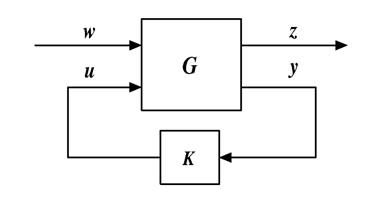

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

Definition of G

In [2]:
# System dynamics
A = np.array([[-1, 1, 2],
              [-1, -1, 0],
              [0, 0, -2]])

# Performance input matrix (w)
B1 = np.array([[1, 0],
               [0, 0],
               [0, 1]])

# Command input matrix (u)
B2 = np.array([[0],
               [1],
               [0]])

# Performance output matrices (z)
C1 = np.array([[0, 1, 0],
               [1, 0, 1]])
D11 = np.array([[0, 0],
                [0, 0]])
D12 = np.array([[1],
                [0]])

# Measured output matrices (y)
C2 = np.array([[0, 1, 0]])
D21 = np.array([[0, 1]])
D22 = np.array([[0]])

# Dimensions: number of states
nx = np.size(A,0)
# Number of command inputs
nu = np.size(B2,1)
# Number of measured outputs
ny = np.size(C2,0)

# Define the augmented plant G
BG = np.block([B1, B2])
CG = np.block([[C1], [C2]])
DG = np.block([[D11, D12], [D21, D22]])
G = ct.ss(A, BG, CG, DG)


Compute the optimal $H_\infty$ controller

In [3]:
# Input to hinfsyn is G, number of controller inputs nmeas and of controller outputs ncon
# Output is the controller, closed-loop Tzw and ||Tzw||_inf = gamma
K, Tzw, gamma, rcond = ct.hinfsyn(G, nmeas=ny, ncon=nu)

Display results

In [4]:
display(f'Closed-loop H_inf norm of Tzw: {gamma}')
display("Controller transfer function K:", ct.tf(K))
display("Closed loop transfer function Tzw:", ct.tf(Tzw))

'Closed-loop H_inf norm of Tzw: 1.2747548794322938'

'Controller transfer function K:'

TransferFunction(array([-0.78709248, -2.04510168,  1.22539298]), array([1.        , 4.9255343 , 7.96042403, 1.83808949]))

'Closed loop transfer function Tzw:'

TransferFunction([[array([-2.22044605e-16, -1.00000000e+00, -6.13844182e+00, -1.41922060e+01,
       -1.48941272e+01, -6.12696495e+00]), array([ -0.78709248,  -5.98056406, -18.0839477 , -25.27838871,
       -13.07271795,   1.22539294])], [array([ 1.        ,  7.9255343 , 25.52411941, 39.18971682, 24.29992692,
        1.22539303]), array([ 1.        ,  8.9255343 , 31.66256123, 54.16901529, 41.23915577,
        6.12696499])]], [[array([ 1.        ,  8.9255343 , 34.44965371, 71.63937052, 81.30113636,
       43.2842575 ,  4.90157201]), array([ 1.        ,  8.9255343 , 34.44965371, 71.63937052, 81.30113636,
       43.2842575 ,  4.90157201])], [array([ 1.        ,  8.9255343 , 34.44965371, 71.63937052, 81.30113636,
       43.2842575 ,  4.90157201]), array([ 1.        ,  8.9255343 , 34.44965371, 71.63937052, 81.30113636,
       43.2842575 ,  4.90157201])]])

Singular value plot of the closed loop $T_{zw}$

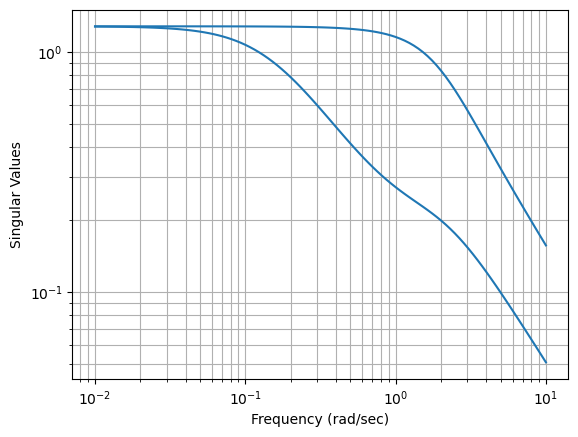

In [5]:
# Frequency grid
omega = np.logspace(-2, 1, 100)

# Plot figure
ct.freqplot.singular_values_plot(Tzw, omega);